# Chapter 27

# Deep Learning II

1. Deep learning
2. Introduction to Tensorflow
3. Introduction to Keras

## Deep learning

## Introduction to Tensorflow

## Introduction to Keras

In [1]:
!pip install -q tensorflow
!pip install -q scikit-learn


In [2]:

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.7.0


In [3]:

# datasetFileName = "../gokPrj/alldataset.npz"
datasetFileName = "../gokPrj/master_dataset.npz"

with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


(423,)
(423,)
(423,)


In [4]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


object
int32
<U10
(423,)
(423,)
(423,)


In [5]:
dataLabels[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0])

In [6]:
dataLabelNames[0:10]

array(['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng',
       'mahmuda', 'numan', 'saseendran', 'afiq'], dtype='<U10')

In [7]:
classNames = sorted(np.unique(dataLabelNames))
classNames

['afiq',
 'azureen',
 'gavin',
 'goke',
 'inamul',
 'jincheng',
 'mahmuda',
 'numan',
 'saseendran']

In [8]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [9]:
dataLabels = dataLabels.astype('uint8')
dataLabels.dtype

dtype('uint8')

In [10]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.3, random_state=42)

print(trainImages.shape)
print(testImages.shape)


(296, 200, 200, 3)
(127, 200, 200, 3)


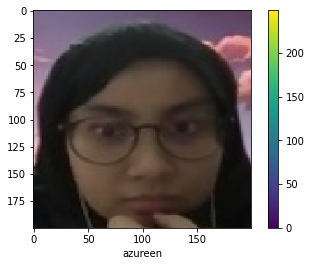

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 9)

In [13]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0


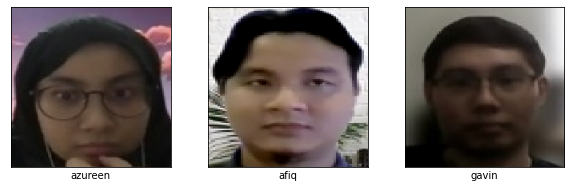

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [15]:
# creating the model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape) #,
    # tf.keras.layers.Softmax()
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
testImages.dtype

dtype('float64')

In [18]:
fitResult = model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 123ms/step - loss: 48.0868 - accuracy: 0.1892
Epoch 2/10
10/10 [==============================] - 1s 113ms/step - loss: 14.9171 - accuracy: 0.5709
Epoch 3/10
10/10 [==============================] - 1s 112ms/step - loss: 4.0125 - accuracy: 0.7196
Epoch 4/10
10/10 [==============================] - 1s 111ms/step - loss: 1.7311 - accuracy: 0.8041
Epoch 5/10
10/10 [==============================] - 1s 111ms/step - loss: 0.9248 - accuracy: 0.8750
Epoch 6/10
10/10 [==============================] - 1s 105ms/step - loss: 0.4359 - accuracy: 0.9155
Epoch 7/10
10/10 [==============================] - 1s 107ms/step - loss: 0.3814 - accuracy: 0.9324
Epoch 8/10
10/10 [==============================] - 1s 111ms/step - loss: 0.2822 - accuracy: 0.9595
Epoch 9/10
10/10 [==============================] - 1s 112ms/step - loss: 0.1361 - accuracy: 0.9730
Epoch 10/10
10/10 [==============================] - 1s 106ms/step - loss: 0.1898 - accuracy: 0.95

In [19]:
fitResult.history

{'loss': [48.0867919921875,
  14.91708755493164,
  4.012543678283691,
  1.7311149835586548,
  0.9248281717300415,
  0.4359082281589508,
  0.38137125968933105,
  0.28216370940208435,
  0.1360924392938614,
  0.18979035317897797],
 'accuracy': [0.18918919563293457,
  0.5709459185600281,
  0.7195945978164673,
  0.8040540814399719,
  0.875,
  0.9155405163764954,
  0.9324324131011963,
  0.9594594836235046,
  0.9729729890823364,
  0.9594594836235046]}

In [25]:
trainLoss, trainAcc = fitResult.history['loss'][-1], fitResult.history['accuracy'][-1]
trainLoss, trainAcc

(0.18979035317897797, 0.9594594836235046)

In [26]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)
testLoss, testAcc

4/4 - 0s - loss: 0.4468 - accuracy: 0.9291 - 247ms/epoch - 62ms/step

Test accuracy: 0.9291338324546814


(0.44684427976608276, 0.9291338324546814)

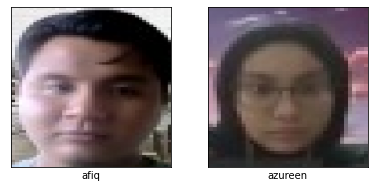

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])
plt.show()

In [27]:
predictions = model.predict(testImages)
predictions[0]

array([ 37.013718  ,   0.9454189 ,  -8.668213  , -11.577971  ,
       -55.74254   ,  -6.952677  , -23.118956  ,  22.41721   ,
        -0.28186688], dtype=float32)

In [28]:
i = 1
predictedLabel = np.argmax(predictions[i])
predictedLabel, testLabels[i], predictedLabel == testLabels[i]

(1, 1, True)

### Using Softmax

Softmax layer assist in turning the prediction values to fractions. Showing the highest value as the most likely.

In [29]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probabilityModel.predict(testImages)
predictions[0]


array([9.9999952e-01, 2.1663909e-16, 1.4474029e-20, 7.8867294e-22,
       0.0000000e+00, 8.0470767e-20, 7.6685068e-27, 4.5794874e-07,
       6.3494007e-17], dtype=float32)

In [30]:
np.argmax(predictions[0]), testLabels[0]

(0, 0)

### Saving Model

In [34]:
import os

exportPath = ""

# if testAcc > 0.95:
modelDir = 'tf_model'
version = f"4_{(testAcc*100):.0f}"

# for SavedModel format
exportPath = os.path.join(modelDir, version)

# save the model
model.save(exportPath, save_format="tf")

print('\nexport path = {}'.format(exportPath))

!dir {exportPath}

INFO:tensorflow:Assets written to: tf_model\4_93\assets

export path = tf_model\4_93
 Volume in drive C is Windows
 Volume Serial Number is 7E8A-CA12

 Directory of c:\github\cv\advance\tf_model\4_93

11/30/2021  11:40 PM    <DIR>          .
11/30/2021  11:40 PM    <DIR>          ..
11/30/2021  11:39 PM    <DIR>          assets
11/30/2021  11:40 PM             7,521 keras_metadata.pb
11/30/2021  11:40 PM            70,826 saved_model.pb
11/30/2021  11:40 PM    <DIR>          variables
               2 File(s)         78,347 bytes
               4 Dir(s)  10,815,746,048 bytes free


### Load Model

In [35]:
# load SavedModel format

exportPath = exportPath
newModel = tf.keras.models.load_model(exportPath)

# Check its architecture
newModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Evaluate the restored model
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

newPredictions[0]

4/4 - 1s - loss: 0.4468 - accuracy: 0.9291 - 544ms/epoch - 136ms/step
Restored model, accuracy: 92.91%
(127, 9)


array([ 37.013718  ,   0.9454189 ,  -8.668213  , -11.577971  ,
       -55.74254   ,  -6.952677  , -23.118956  ,  22.41721   ,
        -0.28186688], dtype=float32)

In [37]:
print("prediction: ", np.argmax(newPredictions[0]))
print("actual: ", testLabels[0])


prediction:  0
actual:  0


In [40]:
probabilityModel = tf.keras.Sequential([newModel, tf.keras.layers.Softmax()])

newPredictions = probabilityModel.predict(testImages)
newPredictions[3]


array([1.1208110e-21, 2.6324209e-21, 3.8786419e-13, 8.3713219e-25,
       1.7762657e-36, 1.4449119e-25, 1.0000000e+00, 1.0725138e-34,
       2.1482910e-20], dtype=float32)

In [41]:
np.argmax(newPredictions[3]), testLabels[3]

(6, 6)

## Simulation for Best Models

In [42]:
# %%
maxIterations = 10
testAccList = []
thresholdAcc = 0.97
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch=10

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    # print('\nTest accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='... ')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f"4_{(testAcc*100):.0f}"

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)
        # save the model
        model.save(exportPath, save_format="tf")
        # print(f'\nexport path = {exportPath}')
        print(f'export path = {exportPath}', end='')

        # # HDF5 format
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # # Save the entire model to a HDF5 file.
        # # The '.h5' extension indicates that the model should be saved to HDF5.
        # model.save(exportPath)
        # print("saved: ", exportPath)

        thresholdAcc = testAcc
        
    print('.')
    


simulation 1... test accuracy 0.9212598204612732... .
simulation 2... test accuracy 0.9291338324546814... .
simulation 3... test accuracy 0.9370078444480896... .
simulation 4... test accuracy 0.9448819160461426... .
simulation 5... test accuracy 0.9212598204612732... .
simulation 6... test accuracy 0.9370078444480896... .
simulation 7... test accuracy 0.9685039520263672... .
simulation 8... test accuracy 0.8582677245140076... .
simulation 9... test accuracy 0.9370078444480896... .
simulation 10... test accuracy 0.913385808467865... .


## Class Activity

Simulate until a threshold accuracy value is obtained else 1000 max iteration.

# Example

Simulate and save the model with max accuracy.

In [43]:
# %%
maxIterations = 10
testAccList = []
thresholdAcc = 0.5
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch=10

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    # print('\nTest accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='... ')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f"4_max"

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)
        # save the model
        model.save(exportPath, save_format="tf")
        # print(f'\nexport path = {exportPath}')
        print(f'export path = {exportPath}', end='')

        # # HDF5 format
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # # Save the entire model to a HDF5 file.
        # # The '.h5' extension indicates that the model should be saved to HDF5.
        # model.save(exportPath)
        # print("saved: ", exportPath)

        thresholdAcc = testAcc
        
    print('.')
    


simulation 1... test accuracy 0.9448819160461426... INFO:tensorflow:Assets written to: tf_model\4_max\assets
export path = tf_model\4_max.
simulation 2... test accuracy 0.9055117964744568... .
simulation 3... test accuracy 0.8976377844810486... .
simulation 4... test accuracy 0.960629940032959... INFO:tensorflow:Assets written to: tf_model\4_max\assets
export path = tf_model\4_max.
simulation 5... test accuracy 0.913385808467865... .
simulation 6... test accuracy 0.9370078444480896... .
simulation 7... test accuracy 0.8976377844810486... .
simulation 8... test accuracy 0.913385808467865... .
simulation 9... test accuracy 0.913385808467865... .
simulation 10... test accuracy 0.9448819160461426... .


# Assignment


1. Upload your [yourname]dataset.npz to whatapp group
2. Vary the parameters from spliting data into trainImage and testImage to find the best accuracy.
3. Predict and dispaly your predictions.

# Assignment 

1. Convert the dataset images to grayscale before training and testing.
Hint: remember that the input shape will change.

# 1 hour Workout

Send your images data to email: gokeladokun@gmail.com 